In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy 
from scipy.interpolate import interp1d
import math

# Stochastic Degradation Model

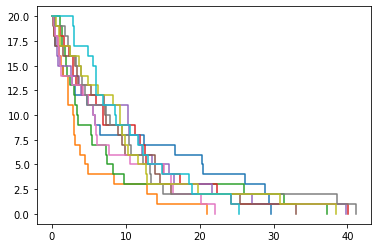

In [24]:
k = 0.1

for i in range(10):
    A = 20
    t = 0
    tao_vals = []
    mol_conc = [A]
    time = [t]
    
    while A > 0:
        r = np.random.uniform(0,1)
        tao = (1/(A*k))*np.log(1/r)
        tao_vals.append(tao)
        t += tao
        time.append(t)
        A = A-1
        mol_conc.append(A)
        
    plt.step(time, mol_conc, where='post') 
    
plt.show()
